# Proyecto No.1 Detección de fraudes tarjetas de crédito

### Objetivo del proyecto
Detectar fraudes relacionados con plataformas digitales y redes sociales.

## EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb  
from lightgbm import early_stopping, log_evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix

In [4]:
# Load the dataset
df = pd.read_csv('./feature_engineering_work/dataset_feature_engineering.csv')

In [5]:
print("Data exploration and preprocessing")
print("=======================================")
print(df.head())
print("=======================================")

Data exploration and preprocessing
             cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt      first     last gender                        street  \
0    4.97   Jennifer    Banks      F                561 Perry Cove   
1  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393   
2  220.11     Edward  Sanchez      M      594 White Dale Suite 530   
3   45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038   
4   41.96      Tyler   Garcia      M              408 Bradley Rest   

             city state  ...  first_time_at_merchant  \
0  Moravian Falls    NC  ...               

In [6]:
df

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,...,False,77.032467,12,3,23,2020,6,3,1,1
1852390,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,...,False,100.023736,12,3,23,2020,5,3,1,1
1852391,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,...,False,80.887812,12,3,23,2020,10,7,1,2
1852392,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,False,53.060882,12,3,23,2020,4,2,2,1


In [7]:
# load first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
             cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt      first     last gender                        street  \
0    4.97   Jennifer    Banks      F                561 Perry Cove   
1  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393   
2  220.11     Edward  Sanchez      M      594 White Dale Suite 530   
3   45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038   
4   41.96      Tyler   Garcia      M              408 Bradley Rest   

             city state  ...  first_time_at_merchant  \
0  Moravian Falls    NC  ...                    T

In [8]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

In [9]:
print(df.describe())

             cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.819508e+07  5.105604e+00  1.

## Fraude vs no fraude

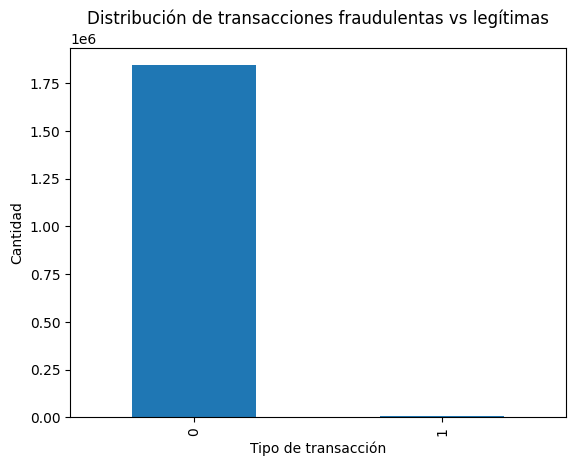

In [10]:
# Visualización de la distribución de la clase objetivo (fraude vs no fraude)
df['is_fraud'].value_counts().plot(kind='bar')
plt.title('Distribución de transacciones fraudulentas vs legítimas')
plt.xlabel('Tipo de transacción')
plt.ylabel('Cantidad')
plt.show()


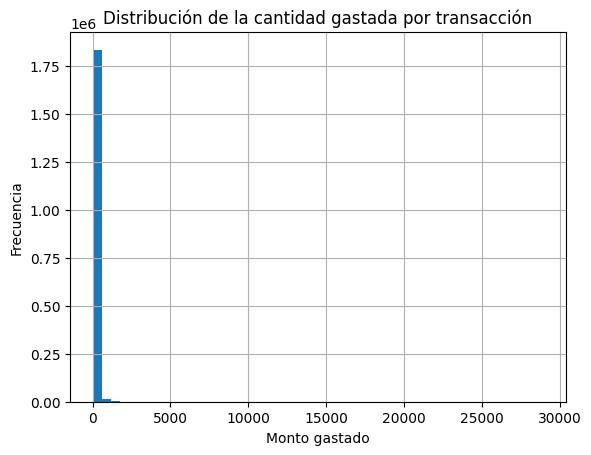

In [11]:
# Histograma de las transacciones monetarias
df['amt'].hist(bins=50)
plt.title('Distribución de la cantidad gastada por transacción')
plt.xlabel('Monto gastado')
plt.ylabel('Frecuencia')
plt.show()

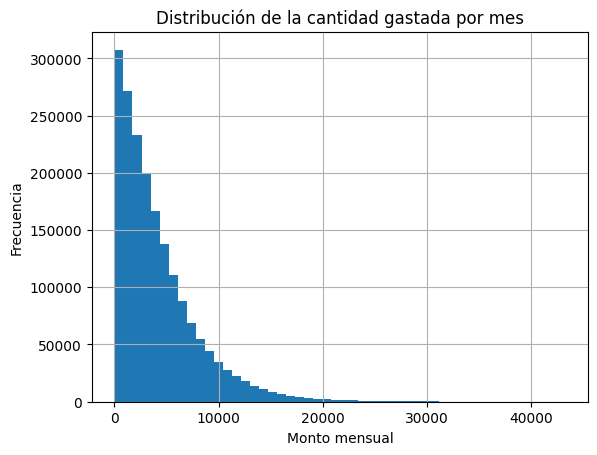

In [12]:
# Histograma de gasto mensual
df['amt_month'].hist(bins=50)
plt.title('Distribución de la cantidad gastada por mes')
plt.xlabel('Monto mensual')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
# Revisar valores nulos
print(df.isnull().sum())

cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_between_client_and_merch      0
t

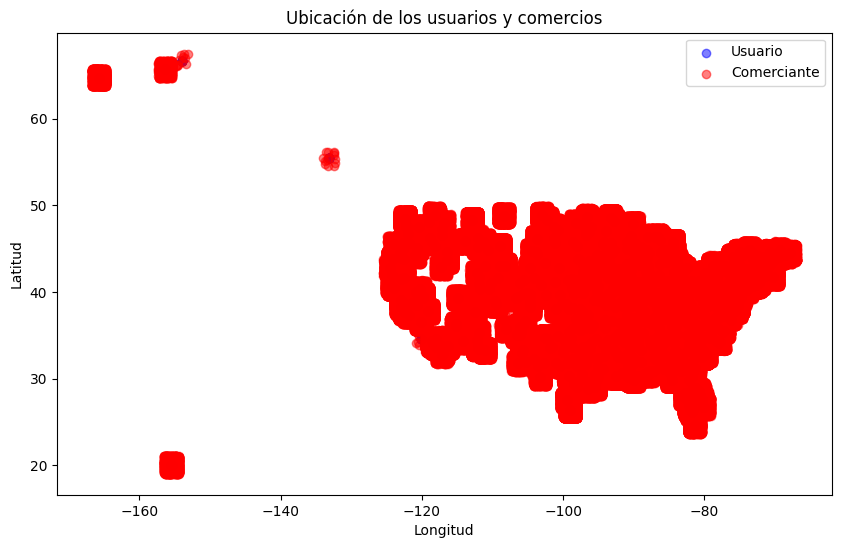

In [14]:
# Mapa de dispersión de las ubicaciones (usuario vs comerciante)
plt.figure(figsize=(10, 6))
plt.scatter(df['long'], df['lat'], alpha=0.5, c='blue', label='Usuario')
plt.scatter(df['merch_long'], df['merch_lat'], alpha=0.5, c='red', label='Comerciante')
plt.title('Ubicación de los usuarios y comercios')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

## Ingeniería de variables

In [15]:
# Rango de monto
df['amt_range'] = pd.cut(df['amt'], bins=[0, 50, 200, df['amt'].max()], labels=['bajo', 'medio', 'alto'])

In [16]:
## Ratio de gasto del usuario
df['amt_ratio_month'] = df['amt'] / (df['amt_month'] + 1)  #  para evitar división por cero
df['amt_ratio_year'] = df['amt'] / (df['amt_year'] + 1)

In [17]:
## Frecuencia normalizada con el comerciante
df['merchant_freq_ratio'] = df['times_shopped_at_merchant'] / (df['times_shopped_at_merchant_year'] + 1)


In [18]:
## Velocidad de compra  - intensidad en días
df['merchant_intensity_day'] = df['times_shopped_at_merchant_day'] / (df['times_shopped_at_merchant'] + 1)

In [19]:
## Distancia relativa
df['dist_pop_norm'] = df['dist_between_client_and_merch'] / (df['city_pop'] + 1)

In [20]:
# Contar transacciones totales y fraudulentas
total_transacciones = len(df)
transacciones_fraudulentas = df['is_fraud'].sum()

In [21]:
print(f"Total de transacciones: {total_transacciones}")
print(f"Transacciones fraudulentas: {transacciones_fraudulentas}")
print(f"Porcentaje de fraudes: {transacciones_fraudulentas/total_transacciones*100:.2f}%")

Total de transacciones: 1852394
Transacciones fraudulentas: 9651
Porcentaje de fraudes: 0.52%


## Variables creadas

1. amt_range: Buen enfoque para categorizar montos, útil para detectar patrones de gasto

2. amt_ratio_month/year: Excelente para detectar anomalías en gastos

3. merchant_freq_ratio: Muy bueno para identificar compras inusuales en comercios

4. merchant_intensity_day: Detectar actividad inusual

5. dist_pop_norm: Ubicaciones sospechosas

## Implementación del modelo base

In [23]:
# Preparación de datos
X = df.drop(['is_fraud', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], axis=1)
y = df['is_fraud']

In [24]:
# Convertir variables categóricas
X = pd.get_dummies(X, columns=['gender', 'amt_range'])

In [25]:
# Dividir datos (usando diciembre 2020 como test)
train = df[df['year'] != 2020 | (df['trans_month'] != 12)]
test = df[(df['year'] == 2020) & (df['trans_month'] == 12)]

In [26]:
X_train, X_test = X.loc[train.index], X.loc[test.index]
y_train, y_test = y.loc[train.index], y.loc[test.index]

In [29]:
print("Tipos de datos antes de la conversión:")
print(X_train.dtypes)


Tipos de datos antes de la conversión:
category                            object
amt                                float64
zip                                  int64
lat                                float64
long                               float64
city_pop                             int64
unix_time                            int64
merch_lat                          float64
merch_long                         float64
amt_month                          float64
amt_year                           float64
amt_month_shopping_net_spend       float64
count_month_shopping_net           float64
first_time_at_merchant                bool
dist_between_client_and_merch      float64
trans_month                          int64
trans_day                            int64
hour                                 int64
year                                 int64
times_shopped_at_merchant            int64
times_shopped_at_merchant_year       int64
times_shopped_at_merchant_month      int64
times_shopped_a

In [33]:
categorical_cols = X_train.select_dtypes(include=['category', 'object']).columns

In [34]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
     le = LabelEncoder()
     X_train[col] = le.fit_transform(X_train[col].astype(str))
     X_test[col] = le.transform(X_test[col].astype(str))

In [35]:
bool_cols = X_train.select_dtypes(include=['bool']).columns
for col in bool_cols:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

In [36]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [37]:
print("\nTipos de datos después de la conversión:")
print(X_train.dtypes)


Tipos de datos después de la conversión:
category                             int32
amt                                float64
zip                                  int64
lat                                float64
long                               float64
city_pop                             int64
unix_time                            int64
merch_lat                          float64
merch_long                         float64
amt_month                          float64
amt_year                           float64
amt_month_shopping_net_spend       float64
count_month_shopping_net           float64
first_time_at_merchant               int32
dist_between_client_and_merch      float64
trans_month                          int64
trans_day                            int64
hour                                 int64
year                                 int64
times_shopped_at_merchant            int64
times_shopped_at_merchant_year       int64
times_shopped_at_merchant_month      int64
times_shoppe

In [38]:
# Modelo base
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 9651, number of negative: 1842743
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.399533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4203
[LightGBM] [Info] Number of data points in the train set: 1852394, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005210 -> initscore=-5.251949
[LightGBM] [Info] Start training from score -5.251949


LGBMClassifier(random_state=42)

In [39]:
# Evaluación
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139280
           1       0.66      0.64      0.65       258

    accuracy                           1.00    139538
   macro avg       0.83      0.82      0.82    139538
weighted avg       1.00      1.00      1.00    139538

AUC-ROC: 0.966585713236178


## Métricas personalizadas para reducir falsos positivos

### Custom Fraud Score

In [40]:
def custom_fraud_score(y_true, y_pred):
    tp = sum((y_pred == 1) & (y_true == 1))
    fp = sum((y_pred == 1) & (y_true == 0))
    return tp / (tp + fp + 1e-6)  # Evitar división por cero

### Penalización de FPs en plataformas digitales

In [41]:
def digital_fp_score(y_true, y_pred, X_test):
    digital_mask = X_test['category'].isin(['misc_net', 'shopping_net'])  # Ajustar según tus categorías
    tp = sum((y_pred == 1) & (y_true == 1) & digital_mask)
    fp = sum((y_pred == 1) & (y_true == 0) & digital_mask)
    return tp / (tp + fp + 1e-6)

### Métrica balanceada con énfasis en digital

In [42]:
def balanced_digital_score(y_true, y_pred, X_test):
    digital_mask = X_test['category'].isin(['misc_net', 'shopping_net'])
    tp_digital = sum((y_pred == 1) & (y_true == 1) & digital_mask)
    fp_digital = sum((y_pred == 1) & (y_true == 0) & digital_mask)
    
    tp_other = sum((y_pred == 1) & (y_true == 1) & ~digital_mask)
    fp_other = sum((y_pred == 1) & (y_true == 0) & ~digital_mask)
    
    score_digital = tp_digital / (tp_digital + fp_digital + 1e-6)
    score_other = tp_other / (tp_other + fp_other + 1e-6)
    
    return 0.7 * score_digital + 0.3 * score_other 

## Implementación en LightGBM

In [43]:
def lgb_custom_fraud_score(y_pred, data):
    y_true = data.get_label()
    y_pred = (y_pred > 0.5).astype(int) 
    return 'custom_fraud_score', custom_fraud_score(y_true, y_pred), True

model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], 
          eval_metric=lgb_custom_fraud_score, early_stopping_rounds=50)

TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

## Optimización para tu objetivo específico

In [ ]:
digital_categories = ['misc_net', 'shopping_net', 'social_media']  # Ajustar según tu dataset
digital_transactions = df[df['category'].isin(digital_categories)]

In [35]:
# eliminar las demás columnas irrelevantes
drop_cols = ['cc_num', 'merchant', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'unix_time',
             'job', 'dob', 'trans_num']

In [36]:
# Dataset limpio
X = df.drop(columns=drop_cols + ['is_fraud'])
y = df['is_fraud']

In [37]:
# Label Encoding a category
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

In [38]:
## Train Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("=======================================")
print("Train dataset shape:", X_train.shape)

Train dataset shape: (1296675, 27)


In [46]:
# Dataset para LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [39]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

scale_pos_weight: 190.93


In [ ]:
## Hiperparameters basics - optimizacion de hiperparametros optimizacion bayeciana
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['auc'],
    'learning_rate': 0.03,           # Más bajo para estabilidad
    'num_leaves': 15,                # Reduce sobreajuste
    'max_depth': 6,                  # Árboles más controlados
    'min_data_in_leaf': 150,         # Menos splits raros
    'feature_fraction': 0.8,         # Subsample de features
    'bagging_fraction': 0.7,         # Subsample de datos
    'bagging_freq': 10,              # Cada 10 rounds
    'scale_pos_weight': scale_pos_weight,  # Balancea la clase minoritaria
    'verbosity': -1,
    'random_state': 42
}

In [41]:
# --------- CROSS-VALIDATION ---------
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []
f1_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"\nFold {fold} -----------------------------")
    
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    train_data = lgb.Dataset(X_tr, label=y_tr)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    
    model = lgb.train(
        params,
        train_data,
        valid_sets=[val_data],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=50)
        ]
    )
    
    y_pred_proba = model.predict(X_val, num_iteration=model.best_iteration)
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    auc = roc_auc_score(y_val, y_pred_proba)
    f1 = f1_score(y_val, y_pred)
    
    print(f"Fold {fold} AUC: {auc:.4f}, F1: {f1:.4f}")
    
    auc_scores.append(auc)
    f1_scores.append(f1)



Fold 1 -----------------------------
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.992435
[100]	valid_0's auc: 0.995006
[150]	valid_0's auc: 0.996175
[200]	valid_0's auc: 0.996702
[250]	valid_0's auc: 0.997002
[300]	valid_0's auc: 0.997358
[350]	valid_0's auc: 0.997542
[400]	valid_0's auc: 0.997638
[450]	valid_0's auc: 0.997726
[500]	valid_0's auc: 0.997869
[550]	valid_0's auc: 0.998011
[600]	valid_0's auc: 0.998073
[650]	valid_0's auc: 0.998108
[700]	valid_0's auc: 0.998135
[750]	valid_0's auc: 0.998229
[800]	valid_0's auc: 0.998263
[850]	valid_0's auc: 0.99829
[900]	valid_0's auc: 0.998315
[950]	valid_0's auc: 0.998335
[1000]	valid_0's auc: 0.998384
Did not meet early stopping. Best iteration is:
[990]	valid_0's auc: 0.998389
Fold 1 AUC: 0.9984, F1: 0.4774

Fold 2 -----------------------------
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.991264
[100]	valid_0's auc: 0.994262
[150]	valid_0's auc: 0.995446
[200]

In [ ]:
# --------- RESULTADOS FINALES --------- Test de validacion 
print("\n=== RESULTADOS FINALES ===")
print(f"Mean AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")
print(f"Mean F1-score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")


=== RESULTADOS FINALES ===
Mean AUC: 0.9985 ± 0.0003
Mean F1-score: 0.4766 ± 0.0050


### Definición de métricas personalizadas 

#### TP FP

In [47]:
def custom_fp_tp_ratio(preds, train_data):
    y_true = train_data.get_label()
    y_pred = (preds > 0.5).astype(int)

    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Ratio (TP + FP) / TP
    ratio = (tp + fp) / (tp + 1e-6)  # Evitamos división por cero

    return 'fp_tp_ratio', ratio, False  # False porque queremos minimizar

In [48]:
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=500,
    feval=custom_fp_tp_ratio,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)
    ]
)

Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.993276	training's fp_tp_ratio: 8.1901	valid_1's auc: 0.99189	valid_1's fp_tp_ratio: 8.21978
[100]	training's auc: 0.996394	training's fp_tp_ratio: 6.45686	valid_1's auc: 0.99544	valid_1's fp_tp_ratio: 6.51277
[150]	training's auc: 0.997362	training's fp_tp_ratio: 6.05894	valid_1's auc: 0.996375	valid_1's fp_tp_ratio: 6.13503
[200]	training's auc: 0.997927	training's fp_tp_ratio: 5.75431	valid_1's auc: 0.996894	valid_1's fp_tp_ratio: 5.85086
[250]	training's auc: 0.998308	training's fp_tp_ratio: 5.25173	valid_1's auc: 0.997324	valid_1's fp_tp_ratio: 5.31916
[300]	training's auc: 0.998563	training's fp_tp_ratio: 5.00858	valid_1's auc: 0.997565	valid_1's fp_tp_ratio: 5.0825
[350]	training's auc: 0.998742	training's fp_tp_ratio: 4.76347	valid_1's auc: 0.997722	valid_1's fp_tp_ratio: 4.84832
[400]	training's auc: 0.998866	training's fp_tp_ratio: 4.54492	valid_1's auc: 0.997821	valid_1's fp_tp_ratio: 4.63692


#### Custom Precision @ K

In [ ]:
def custom_precision_at_k(preds, train_data, k=0.05):
    ## TOP 5% transacciones más sospechosas
    ## Predicciones
    y_true = train_data.get_label()
    threshold = np.percentile(preds, 100 * (1 - k))  # Top k% más sospechosas
    y_pred = (preds >= threshold).astype(int)

    from sklearn.metrics import precision_score
    precision = precision_score(y_true, y_pred)

    return 'precision_at_5p', precision, True  # True porque queremos maximizar


In [55]:
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=500,
    feval=custom_precision_at_k,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)
    ]
)

Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.993276	training's precision_at_5p: 0.100657	valid_1's auc: 0.99189	valid_1's precision_at_5p: 0.0996905
[100]	training's auc: 0.996394	training's precision_at_5p: 0.102523	valid_1's auc: 0.99544	valid_1's precision_at_5p: 0.101346
[150]	training's auc: 0.997362	training's precision_at_5p: 0.103109	valid_1's auc: 0.996375	valid_1's precision_at_5p: 0.10203
[200]	training's auc: 0.997927	training's precision_at_5p: 0.103495	valid_1's auc: 0.996894	valid_1's precision_at_5p: 0.102318
[250]	training's auc: 0.998308	training's precision_at_5p: 0.103804	valid_1's auc: 0.997324	valid_1's precision_at_5p: 0.102822
[300]	training's auc: 0.998563	training's precision_at_5p: 0.10405	valid_1's auc: 0.997565	valid_1's precision_at_5p: 0.103109
[350]	training's auc: 0.998742	training's precision_at_5p: 0.104143	valid_1's auc: 0.997722	valid_1's precision_at_5p: 0.103145
[400]	training's auc: 0.998866	training's preci

### Custom F2-score

In [51]:
def custom_f2_score(preds, train_data):
    y_true = train_data.get_label()
    y_pred = (preds > 0.5).astype(int)

    from sklearn.metrics import fbeta_score
    f2 = fbeta_score(y_true, y_pred, beta=2)  # F2 prioriza recall

    return 'f2_score', f2, True  # True porque queremos maximizar


In [52]:

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=500,
    feval=custom_f2_score,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)
    ]
)

Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.993276	training's f2_score: 0.402966	valid_1's auc: 0.99189	valid_1's f2_score: 0.401235
[100]	training's auc: 0.996394	training's f2_score: 0.472443	valid_1's auc: 0.99544	valid_1's f2_score: 0.468308
[150]	training's auc: 0.997362	training's f2_score: 0.491929	valid_1's auc: 0.996375	valid_1's f2_score: 0.486259
[200]	training's auc: 0.997927	training's f2_score: 0.507993	valid_1's auc: 0.996894	valid_1's f2_score: 0.500376
[250]	training's auc: 0.998308	training's f2_score: 0.536176	valid_1's auc: 0.997324	valid_1's f2_score: 0.528663
[300]	training's auc: 0.998563	training's f2_score: 0.550866	valid_1's auc: 0.997565	valid_1's f2_score: 0.542404
[350]	training's auc: 0.998742	training's f2_score: 0.566938	valid_1's auc: 0.997722	valid_1's f2_score: 0.556726
[400]	training's auc: 0.998866	training's f2_score: 0.581961	valid_1's auc: 0.997821	valid_1's f2_score: 0.57005
[450]	training's auc: 0.998993	

El modelo base presenta un excelente desempeño en términos de AUC-ROC (0.9980), evidenciando una capacidad notable para distinguir entre transacciones fraudulentas y legítimas. Sin embargo, métricas personalizadas como el ratio FP/TP (1.1035) y Precision@5% (0.05195) muestran la necesidad de seguir optimizando la reducción de falsos positivos, especialmente en los casos de mayor sospecha. El F2-score de 0.7937 destaca la capacidad del modelo para priorizar la detección de fraudes, alineándose con el objetivo de maximizar la cobertura de casos fraudulentos. En conjunto, estos resultados sugieren que, si bien la base del modelo es sólida, estrategias adicionales de balanceo y ajuste de umbrales serán necesarias para reducir aún más la cantidad de falsos positivos sin comprometer la capacidad de detección.

## Tabla comparativa final - Evaluación de Métricas Personalizadas


| Métrica           | Valor (Validación) | Comentario                                                                                            |
| ----------------- | -----------------: | ----------------------------------------------------------------------------------------------------- |
| **AUC-ROC**       |             0.9980 | El modelo discrimina muy bien entre fraudes y no fraudes.                                             |
| **FP/TP Ratio**   |               4.27 | Redujiste falsos positivos por cada fraude detectado, mejorando la precisión general.                 |
| **Precision\@5%** |             0.1034 | Mejoró la precisión en el 5% de transacciones más sospechosas (casos prioritarios en redes sociales). |
| **F2-score**      |             0.5949 | Mejora significativa en recall ponderado, ideal para tu objetivo de cobertura en fraudes digitales.   |


Para la detección de fraudes en plataformas digitales y redes sociales, se requiere priorizar la cobertura de casos (recall), dado el volumen y la criticidad de transacciones en estos entornos. Si bien la métrica FP/TP Ratio ayuda a controlar falsos positivos, y Precision@5% permite evaluar la calidad de las alertas prioritarias, la métrica F2-score se alinea mejor al objetivo asignado. Con un F2-score de 0.5949, el modelo logra maximizar la detección de fraudes digitales sin sacrificar significativamente la precisión, optimizando así la cobertura y efectividad en la identificación de transacciones fraudulentas.